<div style=" ">
    <div style="position:absolute; bottom:68px; left:25px;">
        <h2 style="margin:5px 5px 5px 15px;padding-left:10px">Hochshule Anhalt</h2>
    </div>
    <div style="float:left;">
        <img src="img/hsLogo.JPG" alt="" style="width:300px;">
    </div>   
    <div style="float:left; padding-left: 20px;background-color:#e7e9eb">
        <h1 style="font-family: new times roman">Projekt Data Science 1</h1>
        <h6 style="font-family: new times roman; margin-left:20px;">Student: Amer Goli</h6>
    </div>
    <div style=" display:block;margin-left: 20px;">
    </div>
</div>

<div style="background-color:#e7e9eb;">
    </br>
    </br>
    
   <h1 style="text-align:center;font-family: new times roman; font-size:2.8em">Clustering II</h1>
   

   </br>   </br>  </br> </br>  </br> 
</div>





# Clustering
- Daten normieren
- Teil 1 Demographischen Attr. clustern
- Teil 2 DistanzMatrix clustern
- Teil 3 Anteil Bevölkerung clustern
- Teil 4 Sozioökonomische Attr. clustern 
- Teil 5 Clustering des gesamten Datensatz 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.preprocessing import MinMaxScaler

## Funktionen

In [2]:

global embeding
global reducer
global ClusterNum
ClusterNum =10
karte = gpd.read_file('geo/newfile.shp')


def projection(data, par=None): #2D Visualisierung von Daten
    global ClusterNum

    X = data

    global embeding
    global reducer
    #print("Form der Daten: ",X.shape)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(X)
    #print("Form des Embeddings: ",embedding.shape)

    plt.figure(figsize=(11.6, 5))
    plt.title('UMAP-Projektion Datensatz', fontsize=16)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=par , cmap='Spectral')
    if (par is not None):
        plt.colorbar(boundaries=np.arange(ClusterNum+1)-0.5).set_ticks(np.arange(ClusterNum+1))
        plt.figure(figsize=(12.2, 5))


    col=pd.Series(data=mergedDf.columns)

def ellenbogen_M(data, clustersNum):# Funktion für Ermittlung von Anzahl der Clustern
    Js = []
    assignment = []
    for k in range(2,clustersNum):    
        kmeans = KMeans(n_clusters=k,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(data)
        Js.append(kmeans.inertia_)
        assignment.append(kmeans.labels_)

    plt.figure(figsize=(10.1,5))
    plt.plot(range(2,clustersNum),Js)
    plt.text(-2., 0.35,'',  fontsize=8)
    plt.xlabel('Anzahl Clusters')
    plt.ylabel('Gesamtvariation')
    plt.title('ellenbogen Methode für Kmeans')
    
    plt.show()

def kmeansClu(data, clusterNum):
    global ClusterNum
    kmeans = KMeans(n_clusters=clusterNum,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(data)
    return kmeans

def aggClu(data, clusters):
    return AgglomerativeClustering(n_clusters = clusters).fit(data)#, affinity='manhattan', linkage='single'

def clusterInfo(kmeansLabel):#plot: eine Grafik mit den Clustern und Anzahl deren Elemnten.
    unique, counts = np.unique(kmeansLabel, return_counts=True)

    bins = np.linspace(0, len(counts)-1)
    plt.figure(figsize=(10,5))
    plt.titel = 'sdfsdf'
    plt.hist(kmeansLabel, bins,rwidth=0.99)
    plt.xlabel('Clusters')
    plt.ylabel('Frequency')
    plt.title('Cluster Frequenz')
   # plt.show()

    
def showMap(karte, titel,clusterData1, clusterData2 = None):# kann 2 karten mit unterschiedlichen Infos kriegen. Kann der letzten Parameter ignoriert werden
    if clusterData2 is not None:
        kmeansLabels2 = pd.Series(clusterData2)
        AuslTeil2 = pd.concat([karte, kmeansLabels2], axis=1)
        AuslTeil2['kmeans'] = kmeansLabels2
        AuslTeilGeo2 = GeoDataFrame(AuslTeil2, geometry='geometry')

    kmeansLabels = pd.Series(clusterData1)
    AuslTeil = pd.concat([karte, kmeansLabels], axis=1)
    AuslTeil['kmeans'] = kmeansLabels

    AuslTeilGeo = GeoDataFrame(AuslTeil, geometry='geometry')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
    AuslTeilGeo.plot(ax=ax1,column='kmeans', legend=True)
    if clusterData2 is not None:
        AuslTeilGeo2.plot(ax=ax2,column='kmeans', legend=True)#figsize=(10,10),column='kmeans', legend=True, cmap='YlGnBu')
       # ax2.title.set_text('hh', size=8)
        ax2.set_title(titel[1], size=10) # Title
        
    fig.set_figheight(12)
    fig.set_figwidth(20)
    ax1.set_title(titel[0], size=10)
    ax2.axis('off')
    ax1.axis('off')
    plt.show()

def norm(data):
    normalized_arr = preprocessing.normalize([data])
    return normalized_arr
    
#display((norm(mergedDf[cols[2]])[0]))
def converter(cluster):
    
    if cluster == 'Kreis':
        return 1
    elif cluster == 'Kreisfreie Stadt':
        return 2
    elif cluster == 'Landkreis':
        return 0
    elif cluster == 'Regionalverband':
        return 3        
    elif cluster == 'Stadtkreis':
        return 4

#### Normieren

In [5]:
Data = pd.read_csv("02_DataConsold_.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=',', index_col=0)
#Data.drop(['Kreisart.1'], axis=1, inplace=True)
scaler = MinMaxScaler()
Data[Data.columns[3:485]] = scaler.fit_transform(Data[Data.columns[3:485]])
Data.head()


id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  anteil_bevölkerung_0_bis_17  ...  Ilm-Kreis  \
0          0.379710                     0.423077  ...   0.954585   
1          0.286957                     0.307692  ...   0.795389   
2          0.246377                     0.346154  ...   0.668002   
3          0.307246                     0.512821  ...   0.754420   
4          0.113043                     0.435897  ...   0.796478   

   Weimarer Land  Sonneberg  Saalfeld-Rudolstadt  Saale-Holzland-Kreis  \
0       0.860502   0.971150             0.947115              0.857236   
1       0.704277   0.823321             0.787128              0.701087   
2       0.579508   0.703792             0.658734              0.574698   
3       0.671266   0.785094             0.752528              0.676018   
4       0.728217   0.821258             0.806508              0.743895   

   Saale-Orla-Kreis     Greiz  Altenburger Land  \
0          0.894098  0.835238          0.795934   
1          0.745299  0.689190          0.654630   
2          0.624901  0.569927          0.536360   
3          0.716694  0.668029          0.638611   
4          0.772860  0.738061          0.716798   

                                       nachbarschaft  \
0                                Schleswig-Flensburg   
1                        Plön, Rendsburg-Eckernförde   
2  Herzogtum Lauenburg, Ostholstein, Stormarn, No...   
3              Plön, Rendsburg-Eckernförde, Segeberg   
4  Nordfriesland, Rendsburg-Eckernförde, Schleswi...   

                                            geometry  
0  POLYGON ((9.489823260151168 54.82296231149822,...  
1  POLYGON ((10.19057485868284 54.38909396612953,...  
2  POLYGON ((10.89297122174895 53.95695486512476,...  
3  POLYGON ((10.034541478286 54.129152216881, 10....  
4  MULTIPOLYGON (((9.051759426136824 54.366404068...  

[5 rows x 487 columns]

In [6]:
display(Data[Data['Landkreis'] == 'Diepholz'])

id   Kreisart Landkreis  Fläche_qkm  Bevölkerung  Bevölkerung_Männlich  \
27  3251  Landkreis  Diepholz    0.358122     0.050311              0.050876   

    Bevölkerung_Weiblich  Einwohner_pro_qkm  anteil_ausländer  \
27              0.049764           0.015398          0.182609   

    anteil_bevölkerung_0_bis_17  ...  Ilm-Kreis  Weimarer Land  Sonneberg  \
27                     0.551282  ...   0.376122       0.377248   0.424904   

    Saalfeld-Rudolstadt  Saale-Holzland-Kreis  Saale-Orla-Kreis    Greiz  \
27             0.410617              0.422135          0.438521  0.45461   

    Altenburger Land                                      nachbarschaft  \
27           0.47581  Region Hannover, Hildesheim, Holzminden, Schau...   

                                             geometry  
27  POLYGON ((9.629057486016931 52.13092619594608,...  

[1 rows x 487 columns]

## Korrelation


27    Region Hannover, Hildesheim, Holzminden, Schau...
Name: nachbarschaft, dtype: object

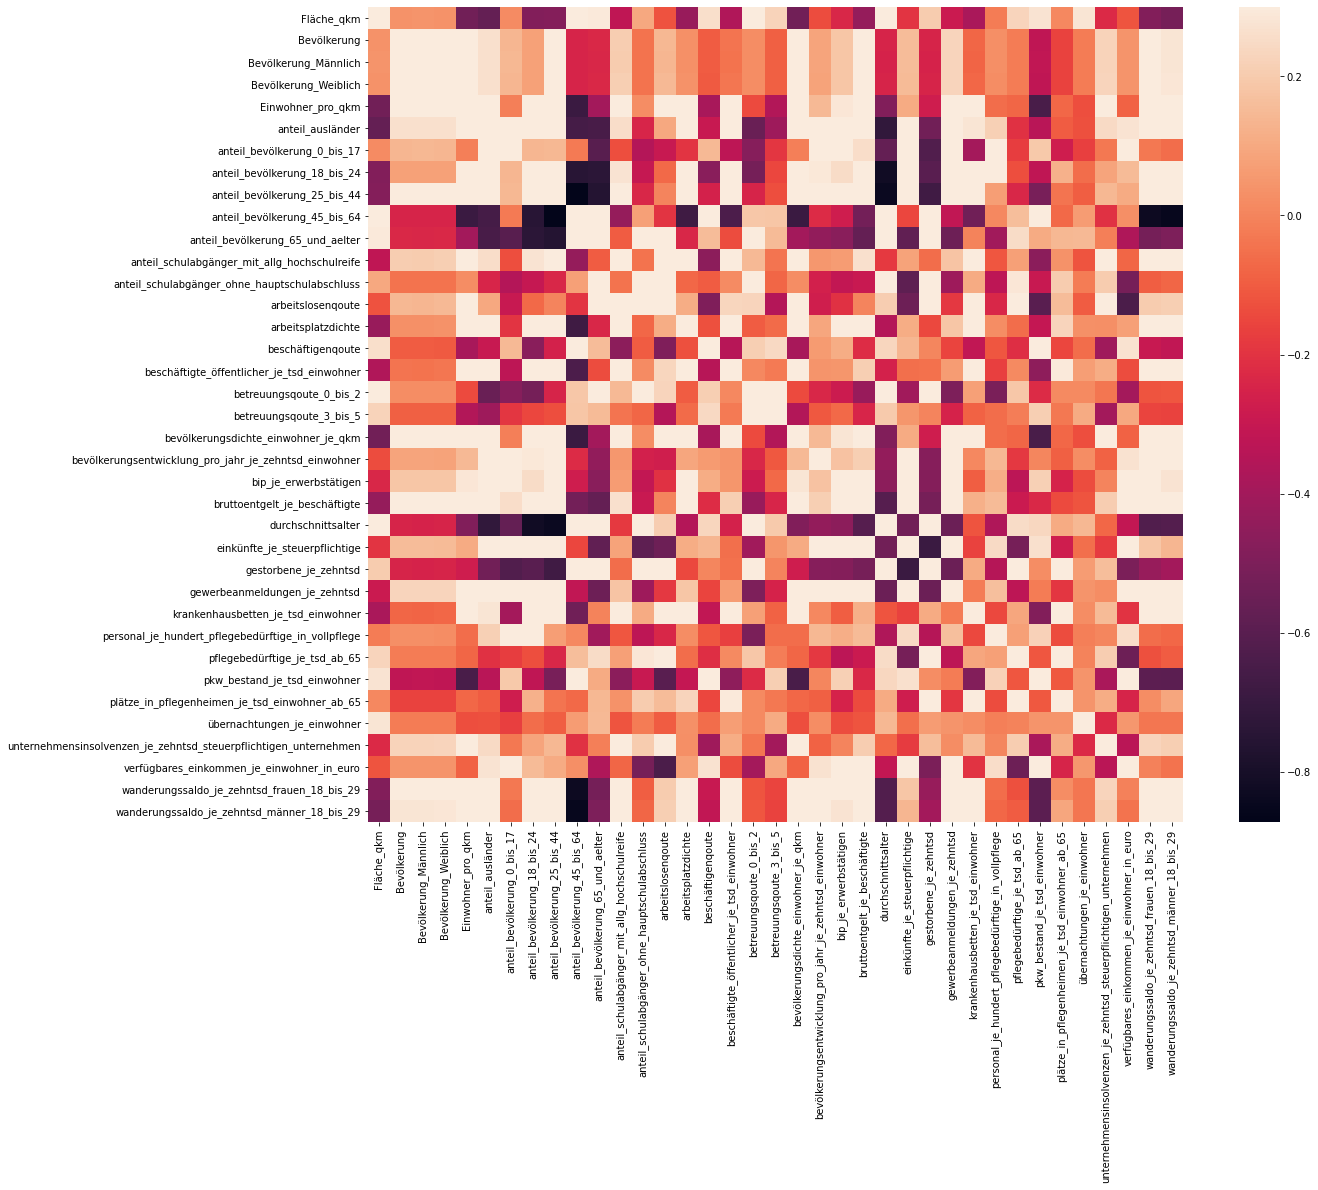

In [48]:
corr = Data[Data.columns[3:40]].corr()
f, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, vmax=.3, square=True)

## Clustering
   Da wir hier mit numerische Daten zu tun haben, ist es sinnvoll, mit Clustringalgorithmen zu arbeiten, die distanzbasiert sind. K-means wäre hier die erste Wahl. Darüber hinaus kann zum Vergleich einen Hirarischischen Clusteringalgorithmus mit Daten probiert werden. Die Auswahl hier ist Agglomerative Clustering. Beide Algorithmen sind flexible und sehr leicht zu verwenden.

#### 1. K-means
   
   K-means gehört zu einfachsten Algorithmen fürs Clustering, welcher auch distanzbasiert (hier euklidische Dist.) ist. Einige Entwicklerinnen und Entwickler tendieren dazu, bei kleinen Datensätzen K-means zu verwenden, weil er gut mit kleinen Datensätzen umgehe. 
   
<img src="img/K means.gif" alt="" style="width:700px;">

###### Quelle: https://buggyprogrammer.com/difference-between-k-means-and-knn/

   
#### 2. AgglomerativeClustering
   
   AgglomerativeClustering ist einer hirarschicher Algorithmus mit verschiedene Ähnlichkeitsmaßen. wir werden hier euklidische Distanz nehmen.
   <img src="img/hierarch.gif" alt="" style="width:700px;">
###### Quelle:https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
  

  
Wir clustern unsere Datensatz vorerst Teilweise.
#### Teil1 der Daten

In [8]:
cols = Data.columns[:9]
Teil1 = Data[cols]
Teil1.head()

id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  
0          0.379710  
1          0.286957  
2          0.246377  
3          0.307246  
4          0.113043

#### Ellenbogenanalyse für Kmeans
Diese Analyse zeigt, dass wir zwischen 4 und 7 Clustern wählen können.
Das passt zur Anzahl der Kreisarten nämlich 5.

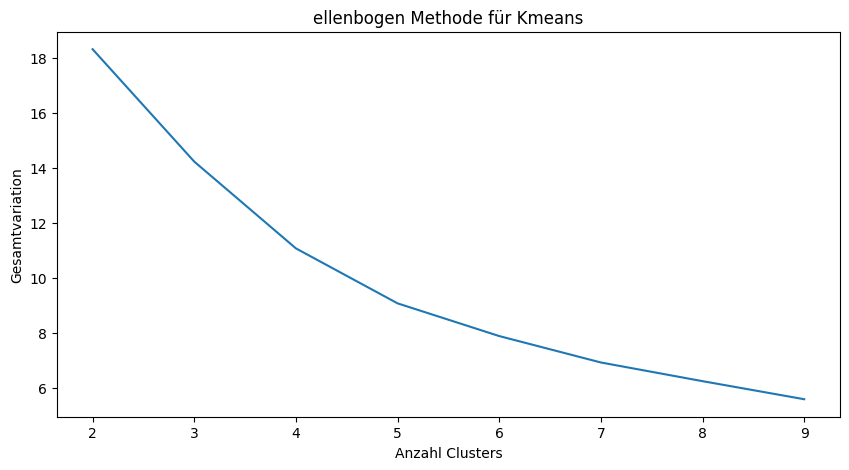

In [9]:
ellenbogen_M(Teil1[Teil1.columns[3:]], 10)

#### Teil1 K-means

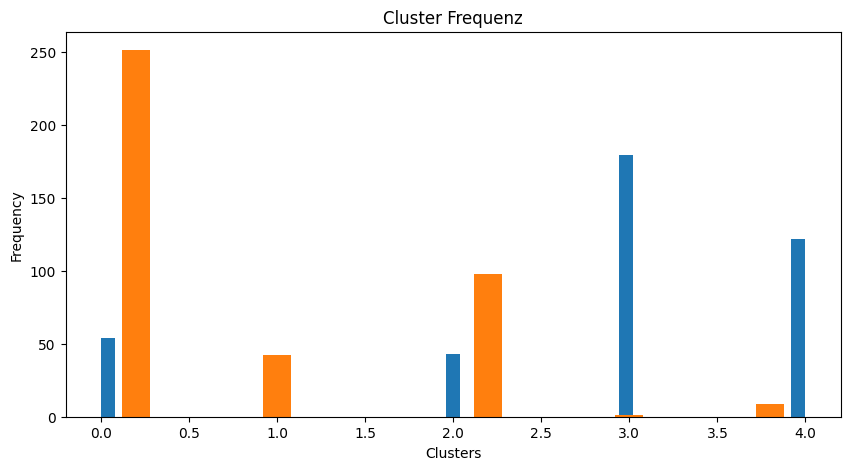

Uniq-Count: Labels in Data  Uniq-Count: clustering
0                           1                       3
1                           9                      43
2                          42                      54
3                          98                     122
4                         251                     179

In [10]:
# mit K-means clustern
T1Tokmeans = Teil1[Teil1.columns[3:]]
kmeans = KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T1Tokmeans)

T1Kmeans = Teil1.copy()
#Kreisarten in numerische Klassen umwandeln und in Dataframe hinzufügen.
T1Kmeans['Clusters'] = T1Kmeans['Kreisart'].apply(converter)

#Clusterzugehörigkeiten dem Datafram hinzufügen
T1Kmeans['ClustersPre'] = kmeans.labels_

#Grafik mit Cluster Freq.
clusterInfo(kmeans.labels_)
plt.hist(T1Kmeans['Clusters'],rwidth=0.4)
plt.show()

#Anzahl der vorkommenden Classen in Datensatz gegenüber Anzahl der vorkommenden Clusterklassen.
unique, counts = np.unique(T1Kmeans['Clusters'], return_counts=True)
uniqueC, countsC = np.unique(kmeans.labels_, return_counts=True)

# Durch das Sortieren wird die Reihenfolge geändert.
c = pd.Series(counts).sort_values().array
cc = pd.Series(countsC).sort_values().array
vergleich = pd.DataFrame({'Uniq-Count: Labels in Data': c, 'Uniq-Count: clustering': cc})
display(vergleich)




Wir haben den Inhalt des Attributes "Kreisart" in numerische Klassen umgewandelt. Die Clusterverteilung bei Clustering ist ähnlich wie bei der Attributes "Kreisart" jedoch in falsche Reihenfolge. Wenn wir die numerische Klassen umordnen, dann wäre die Ergebniss viel besser. Denn die Clustering hat keine Info, welche Klasse mit welcher Clusterzahl repräsentiert wird. 

              precision    recall  f1-score   support

           0       0.91      0.20      0.32       251
           1       0.00      0.00      0.00        42
           2       0.84      0.37      0.51        98
           3       0.00      0.00      0.00         1
           4       0.02      0.22      0.03         9

    accuracy                           0.22       401
   macro avg       0.35      0.16      0.17       401
weighted avg       0.77      0.22      0.33       401



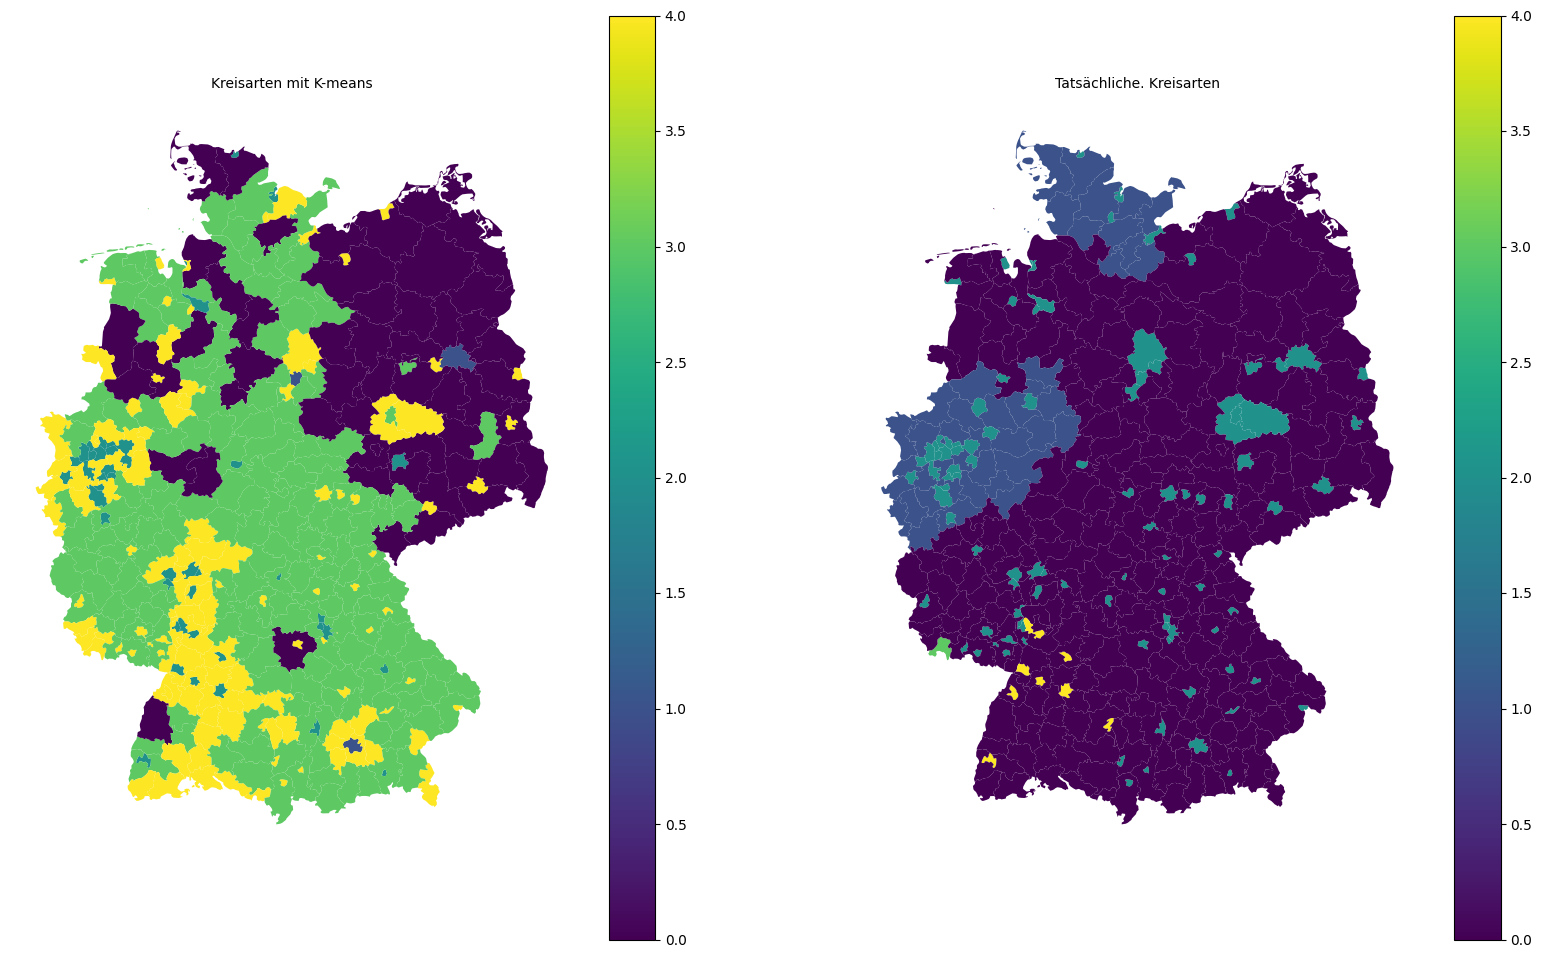

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(T1Kmeans['Clusters'],T1Kmeans['ClustersPre']))
showMap(karte, ['Kreisarten mit K-means','Tatsächliche. Kreisarten'],kmeans.labels_, T1Kmeans['Clusters'].array)

#### Teil 1 Agglomerative Clustering
Das gleiche versuchen wir diesmal mit AgglomerativeClustering.

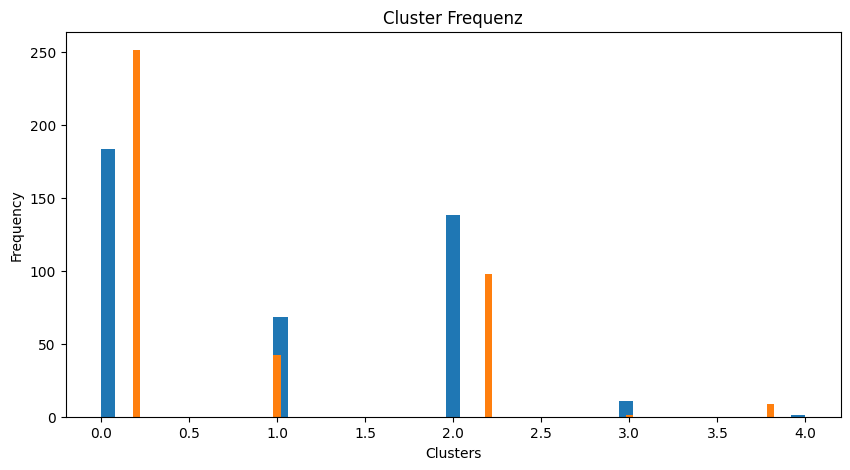

Uniq-Count: Labels in Data  Uniq-Count: clustering
0                           1                       3
1                          11                      43
2                          68                      54
3                         138                     122
4                         183                     179

In [12]:
T1ToAgg = Teil1[Teil1.columns[3:]]
display()
Agg = aggClu(T1ToAgg, 5)#KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T1Tokmeans)

T1Agg = Teil1.copy()
T1Agg['Clusters'] = T1Agg['Kreisart'].apply(converter)
T1Agg['ClustersPre'] = Agg.labels_

clusterInfo(Agg.labels_)
plt.hist(T1Agg['Clusters'],rwidth=0.1)

plt.show()
unique, counts = np.unique(T1Agg['Clusters'], return_counts=True)
unique, counts = np.unique(T1Agg['ClustersPre'], return_counts=True)

c = pd.Series(counts).sort_values().array
cc = pd.Series(countsC).sort_values().array
vergleich = pd.DataFrame({'Uniq-Count: Labels in Data': c, 'Uniq-Count: clustering': cc})
display(vergleich)


              precision    recall  f1-score   support

           0       0.87      0.64      0.74       251
           1       0.00      0.00      0.00        42
           2       0.21      0.30      0.25        98
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9

    accuracy                           0.47       401
   macro avg       0.22      0.19      0.20       401
weighted avg       0.60      0.47      0.52       401



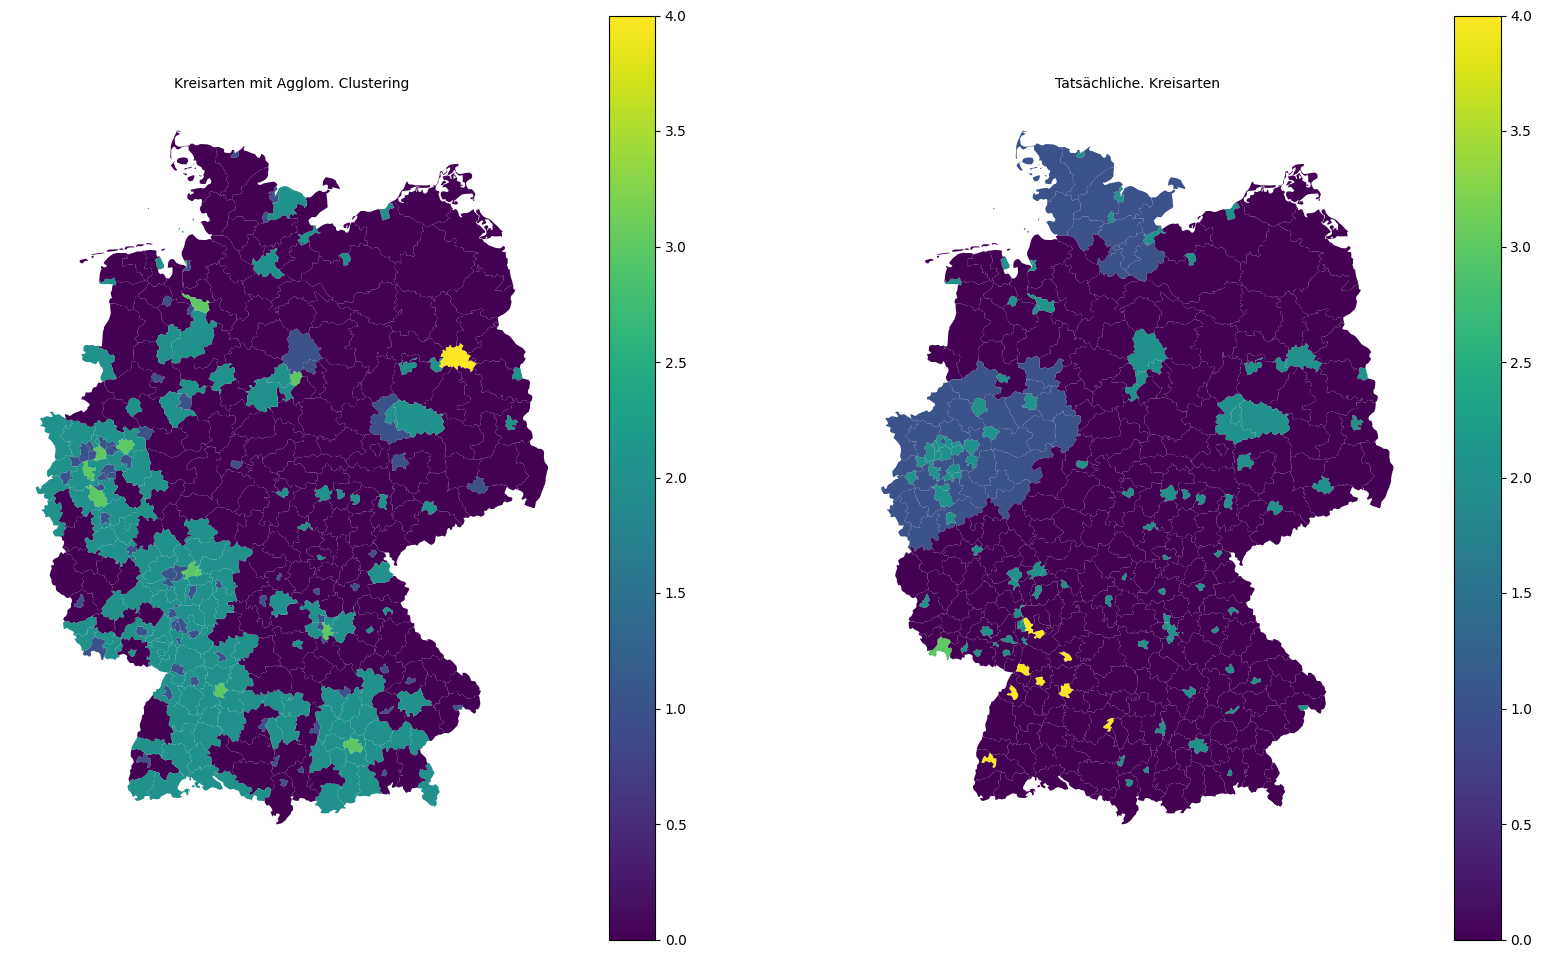

In [13]:
print(classification_report(T1Agg['Clusters'],Agg.labels_))
showMap(karte, ['Kreisarten mit Agglom. Clustering','Tatsächliche. Kreisarten'],Agg.labels_, T1Agg['Clusters'].array)

#### Teil2 der Daten
. DistanzMatrix

Beim Clustern dieser Teildaten ergibt sich eine ähnelnde Struktur wie bei der Struktur der Bundesländern. Es ist sinnvoll, wenn diese Teildaten mit einem dichtebasierten Algorithmus geclustert wird. DBscan wäre eine mögliche Auswahl.
DBscan liefert keine beliebige Anzahl an Clustern. Dies sag schlißlich aus, welche Daten dichter aneinander sind als der Anderen. Dies wird dennoch nicht in diesem Projekt mit DBscan geclustert. Denn es ist noch unklar, wie man Ergebnisse zwei unterschiedlicher Clusterings zu kombinieren hat. Dies kann in zukünftigen Projekten bearbeitet werden.

In [17]:
cols = Data.columns[40:485]
Teil2 = Data[cols]
Teil2#['Kreisart']

Flensburg      Kiel    Lübeck  Neumünster  Dithmarschen  \
0     0.000000  0.098694  0.214537    0.117417      0.062037   
1     0.088849  0.000000  0.081522    0.022656      0.087384   
2     0.182151  0.076886  0.000000    0.079615      0.166267   
3     0.103564  0.022198  0.082707    0.000000      0.069773   
4     0.056855  0.088960  0.179472    0.072499      0.000000   
..         ...       ...       ...         ...           ...   
396   0.567028  0.523467  0.464496    0.510795      0.526852   
397   0.564497  0.512832  0.445728    0.504710      0.534504   
398   0.593069  0.549152  0.488203    0.538984      0.559370   
399   0.598129  0.548233  0.480698    0.542378      0.576706   
400   0.607248  0.554788  0.481964    0.552391      0.596710   

     Herzogtum Lauenburg  Nordfriesland  Ostholstein      Plön  \
0               0.229021       0.025475     0.172428  0.120635   
1               0.093347       0.096814     0.040810  0.000000   
2               0.000000       0.184832     0.000000  0.029263   
3               0.078477       0.094189     0.055028  0.000000   
4               0.172830       0.000000     0.149245  0.088903   
..                   ...            ...          ...       ...   
396             0.433699       0.551690     0.474135  0.507151   
397             0.419724       0.554714     0.454774  0.490557   
398             0.461398       0.580580     0.497082  0.531168   
399             0.460315       0.592149     0.488041  0.525873   
400             0.469919       0.606234     0.488566  0.529886   

     Rendsburg-Eckernförde  ...  Sömmerda  Hildburghausen  Ilm-Kreis  \
0                 0.046970  ...  0.849962        1.000000   0.954585   
1                 0.000000  ...  0.687119        0.853195   0.795389   
2                 0.075431  ...  0.557597        0.731393   0.668002   
3                 0.000000  ...  0.651449        0.807958   0.754420   
4                 0.000000  ...  0.710101        0.827783   0.796478   
..                     ...  ...       ...             ...        ...   
396               0.511645  ...  0.044861        0.000000   0.000000   
397               0.507781  ...  0.028635        0.117067   0.045666   
398               0.540467  ...  0.079392        0.101509   0.059953   
399               0.545902  ...  0.100342        0.196097   0.147224   
400               0.554774  ...  0.169205        0.287084   0.229694   

     Weimarer Land  Sonneberg  Saalfeld-Rudolstadt  Saale-Holzland-Kreis  \
0         0.860502   0.971150             0.947115              0.857236   
1         0.704277   0.823321             0.787128              0.701087   
2         0.579508   0.703792             0.658734              0.574698   
3         0.671266   0.785094             0.752528              0.676018   
4         0.728217   0.821258             0.806508              0.743895   
..             ...        ...                  ...                   ...   
396       0.000000   0.000000             0.000000              0.000000   
397       0.000000   0.072341             0.000000              0.000000   
398       0.022118   0.045059             0.000000              0.000000   
399       0.053507   0.133420             0.052347              0.000000   
400       0.115703   0.219094             0.139855              0.040241   

     Saale-Orla-Kreis     Greiz  Altenburger Land  
0            0.894098  0.835238          0.795934  
1            0.745299  0.689190          0.654630  
2            0.624901  0.569927          0.536360  
3            0.716694  0.668029          0.638611  
4            0.772860  0.738061          0.716798  
..                ...       ...               ...  
396          0.000000  0.043763          0.109747  
397          0.000000  0.000000          0.034733  
398          0.000000  0.000000          0.050139  
399          0.000000  0.000000          0.000000  
400          0.057669  0.000000          0.000000  

[401 rows x 445 columns]

#### Teil2 Agg.

In [18]:
T2ToAgg = Teil2[Teil2.columns[:-1]]
display()
Agg2 = aggClu(T2ToAgg, 16)
T2Agg = Teil1.copy()
T2Agg['Clusters'] = T2Agg['Kreisart'].apply(converter)

unique, counts = np.unique(T2Agg['Clusters'], return_counts=True)

display(T2Agg.head())


id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  Clusters  
0          0.379710         2  
1          0.286957         2  
2          0.246377         2  
3          0.307246         2  
4          0.113043         1

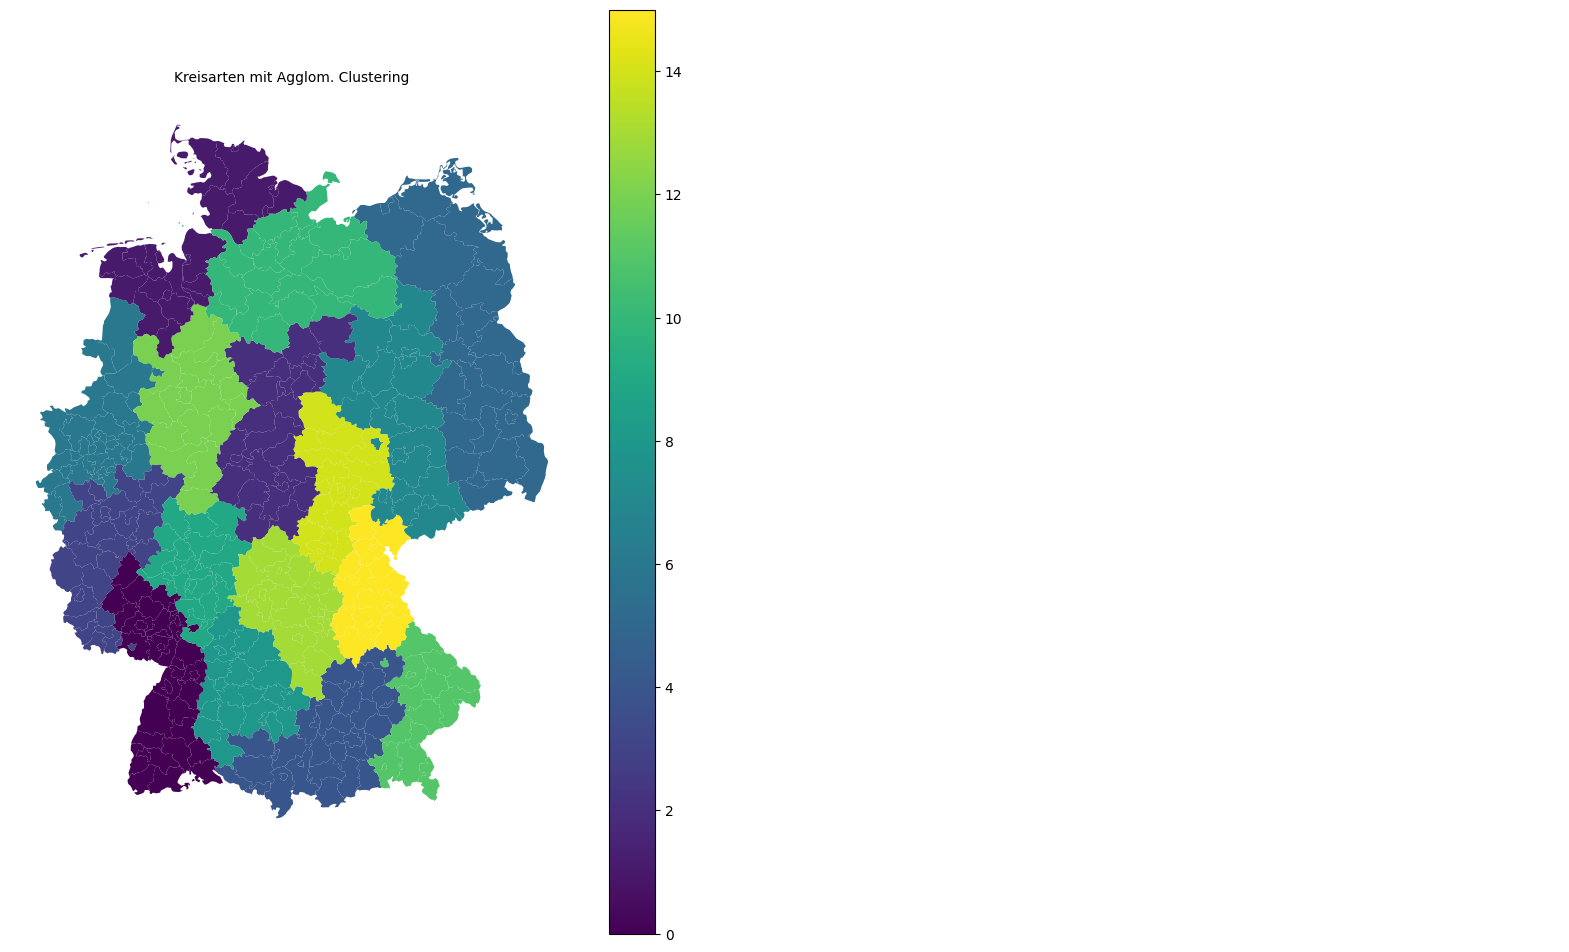

In [19]:
#print(classification_report(T2Agg['Clusters'],Agg2.labels_))
showMap(karte, ['Kreisarten mit Agglom. Clustering'],Agg2.labels_, )

#### Teil 3 der Daten
Anteil Bevölkerung 

In [21]:
cols = Data.columns[9:14]
Teil3 = Data[cols]
Teil3.head()#['Kreisart']

anteil_bevölkerung_0_bis_17  anteil_bevölkerung_18_bis_24  \
0                     0.423077                      0.822917   
1                     0.307692                      0.718750   
2                     0.346154                      0.447917   
3                     0.512821                      0.458333   
4                     0.435897                      0.385417   

   anteil_bevölkerung_25_bis_44  anteil_bevölkerung_45_bis_64  \
0                      0.513158                      0.301587   
1                      0.743421                      0.285714   
2                      0.421053                      0.500000   
3                      0.361842                      0.515873   
4                      0.125000                      0.722222   

   anteil_bevölkerung_65_und_aelter  
0                          0.263158  
1                          0.187135  
2                          0.450292  
3                          0.409357  
4                          0.549708

#### Ellenbogenanalyse für Kmeans Teil3
Diese Analyse zeigt, dass wir zwischen 4 und 7 Clustern wählen können.

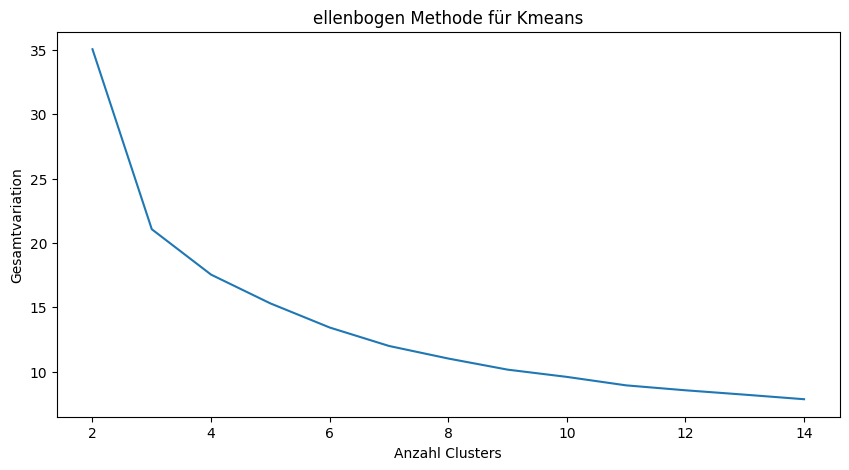

In [22]:
ellenbogen_M(Teil3, 15)


<ipython-input-23-94a7d4801628>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T3Tokmeans['Kreisart'] = Data['Kreisart']


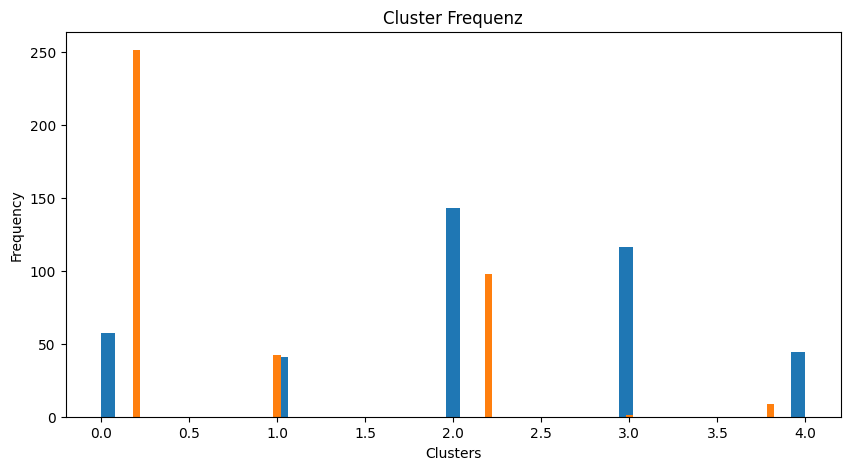

id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  Clusters  ClustersPre  
0          0.379710         2            4  
1          0.286957         2            4  
2          0.246377         2            1  
3          0.307246         2            1  
4          0.113043         1            3

In [23]:
T3Tokmeans = Teil3
T3Tokmeans['Kreisart'] = Data['Kreisart']
kmeans3 = KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T3Tokmeans[T3Tokmeans.columns[:-1]])
clusterInfo(kmeans3.labels_)
T3Kmeans = Teil1.copy()
T3Kmeans['Clusters'] = T3Kmeans['Kreisart'].apply(converter)
T3Kmeans['ClustersPre'] = kmeans3.labels_

plt.hist(T3Kmeans['Clusters'],rwidth=0.1)
plt.show()

T3Kmeans.head()        


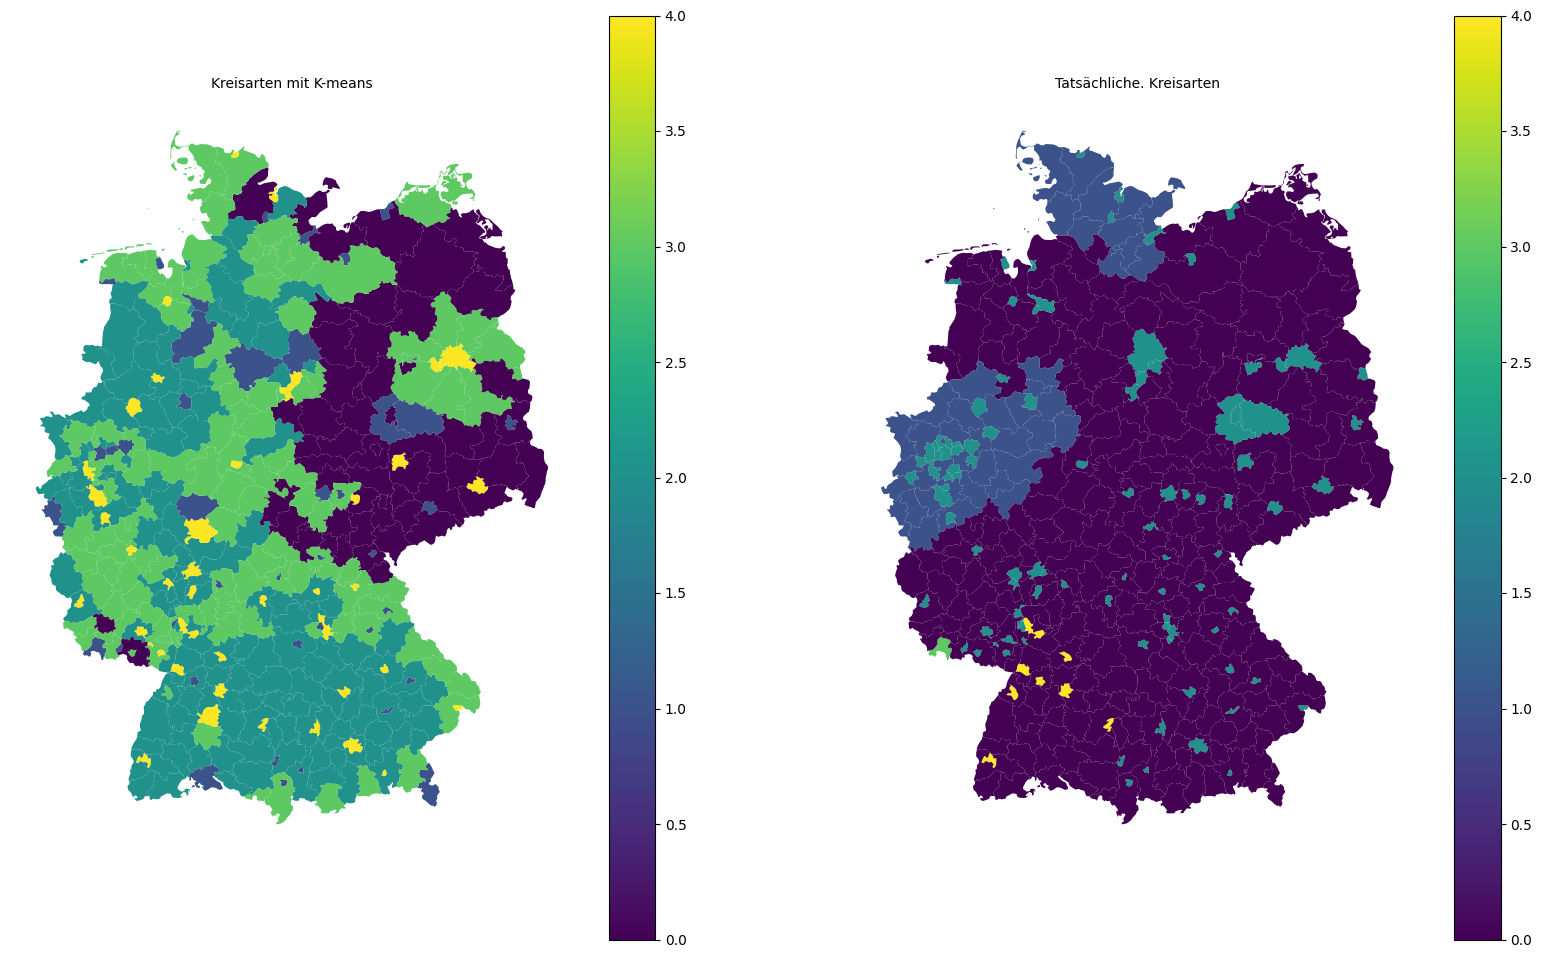

In [24]:
kmeans1 = KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T3Tokmeans[T3Tokmeans.columns[:-1]])
showMap(karte, ['Kreisarten mit K-means','Tatsächliche. Kreisarten'],kmeans3.labels_, T3Kmeans['Clusters'].array)


#### Teil3 Agg.

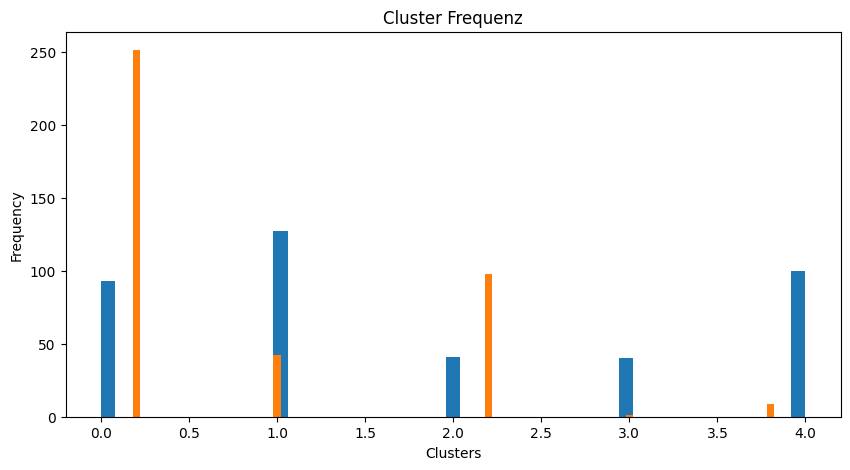

In [25]:
T3ToAgg = Teil3[Teil3.columns[:-1]]
display()
Agg3 = aggClu(T3ToAgg, 5)#KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T3Tokmeans)
clusterInfo(Agg3.labels_)
T3Agg = Teil1.copy()
T3Agg['Clusters'] = T3Agg['Kreisart'].apply(converter)
T3Agg['ClustersPre'] = Agg3.labels_
plt.hist(T3Agg['Clusters'],rwidth=0.1)
plt.show()



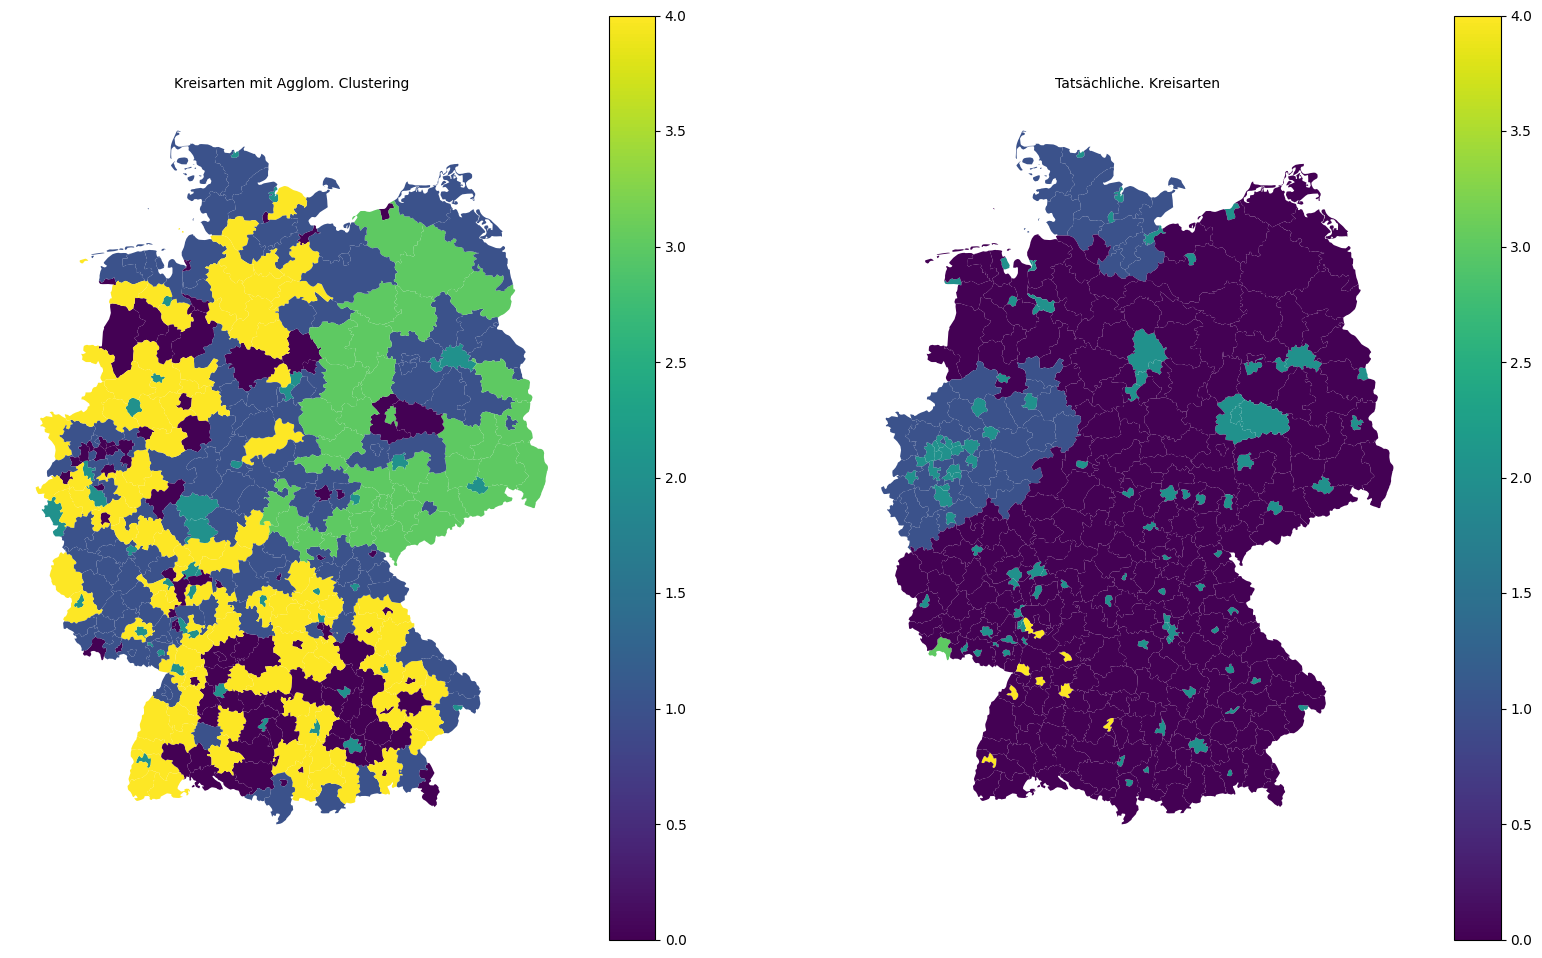

In [26]:
showMap(karte, ['Kreisarten mit Agglom. Clustering','Tatsächliche. Kreisarten'],Agg3.labels_, T3Agg['Clusters'].array)

#### Teil 4 der Daten
Sozioökonomische Attr.


In [27]:
cols = Data.columns[14:40]
display(pd.DataFrame({'Attribute Teil 4':cols}))
Teil4 = Data[cols]
Teil4.head()

Attribute Teil 4
0        anteil_schulabgänger_mit_allg_hochschulreife
1       anteil_schulabgänger_ohne_hauptschulabschluss
2                                   arbeitslosenqoute
3                                  arbeitsplatzdichte
4                                   beschäftigenqoute
5          beschäftigte_öffentlicher_je_tsd_einwohner
6                             betreuungsqoute_0_bis_2
7                             betreuungsqoute_3_bis_5
8                 bevölkerungsdichte_einwohner_je_qkm
9   bevölkerungsentwicklung_pro_jahr_je_zehntsd_ei...
10                              bip_je_erwerbstätigen
11                      bruttoentgelt_je_beschäftigte
12                                 durchschnittsalter
13                      einkünfte_je_steuerpflichtige
14                              gestorbene_je_zehntsd
15                      gewerbeanmeldungen_je_zehntsd
16                 krankenhausbetten_je_tsd_einwohner
17  personal_je_hundert_pflegebedürftige_in_vollpf...
18                      pflegebedürftige_je_tsd_ab_65
19                       pkw_bestand_je_tsd_einwohner
20     plätze_in_pflegenheimen_je_tsd_einwohner_ab_65
21                        übernachtungen_je_einwohner
22  unternehmensinsolvenzen_je_zehntsd_steuerpflic...
23         verfügbares_einkommen_je_einwohner_in_euro
24        wanderungssaldo_je_zehntsd_frauen_18_bis_29
25        wanderungssaldo_je_zehntsd_männer_18_bis_29

anteil_schulabgänger_mit_allg_hochschulreife  \
0                                      0.710938   
1                                      0.673438   
2                                      0.596875   
3                                      0.718750   
4                                      0.426563   

   anteil_schulabgänger_ohne_hauptschulabschluss  arbeitslosenqoute  \
0                                       0.520661           0.582609   
1                                       0.553719           0.547826   
2                                       0.785124           0.521739   
3                                       0.669421           0.573913   
4                                       0.644628           0.365217   

   arbeitsplatzdichte  beschäftigenqoute  \
0            0.402410           0.333333   
1            0.399624           0.325203   
2            0.349550           0.471545   
3            0.421196           0.536585   
4            0.218760           0.512195   

   beschäftigte_öffentlicher_je_tsd_einwohner  betreuungsqoute_0_bis_2  \
0                                    0.305844                 0.448770   
1                                    0.392135                 0.401639   
2                                    0.209721                 0.415984   
3                                    0.217368                 0.317623   
4                                    0.115784                 0.159836   

   betreuungsqoute_3_bis_5  bevölkerungsdichte_einwohner_je_qkm  \
0                 0.681967                             0.351162   
1                 0.550820                             0.431181   
2                 0.616393                             0.205699   
3                 0.344262                             0.228519   
4                 0.449180                             0.012169   

   bevölkerungsentwicklung_pro_jahr_je_zehntsd_einwohner  ...  \
0                                           0.474980      ...   
1                                           0.355343      ...   
2                                           0.354998      ...   
3                                           0.492580      ...   
4                                           0.388934      ...   

   krankenhausbetten_je_tsd_einwohner  \
0                            0.328767   
1                            0.339041   
2                            0.304795   
3                            0.291096   
4                            0.160959   

   personal_je_hundert_pflegebedürftige_in_vollpflege  \
0                                           0.303266    
1                                           0.371695    
2                                           0.223950    
3                                           0.321928    
4                                           0.525661    

   pflegebedürftige_je_tsd_ab_65  pkw_bestand_je_tsd_einwohner  \
0                       0.383667                      0.202262   
1                       0.266564                      0.144950   
2                       0.317925                      0.155744   
3                       0.466872                      0.251349   
4                       0.308166                      0.351452   

   plätze_in_pflegenheimen_je_tsd_einwohner_ab_65  \
0                                        0.540412   
1                                        0.386688   
2                                        0.646593   
3                                        0.746434   
4                                        0.459588   

   übernachtungen_je_einwohner  \
0                     0.057947   
1                     0.049669   
2                     0.147351   
3                     0.029801   
4                     0.215232   

   unternehmensinsolvenzen_je_zehntsd_steuerpflichtigen_unternehmen  \
0                                           0.299889                  
1                                           0.312709                  
2                                        

#### Ellenbogenanalyse für Kmeans Teil4
Diese Analyse zeigt, dass wir zwischen 4 und 7 Clustern wählen können.

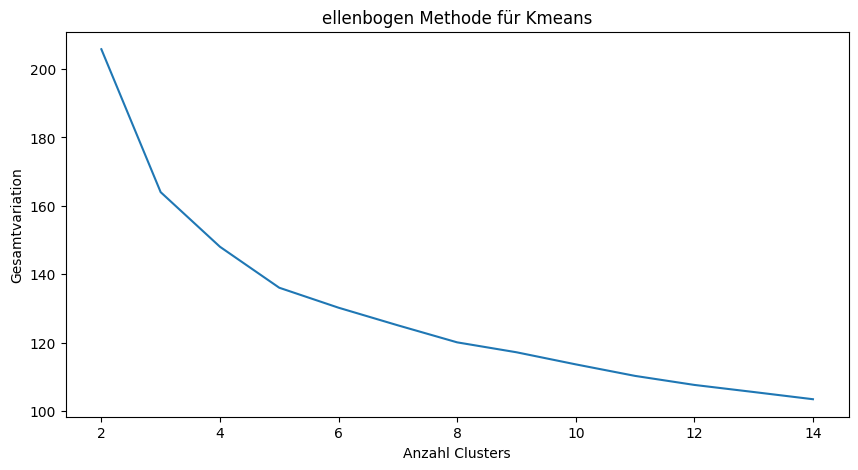

In [28]:
ellenbogen_M(Teil4, 15)


<ipython-input-29-0a8911fc80bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T4Tokmeans['Kreisart'] = Data['Kreisart']


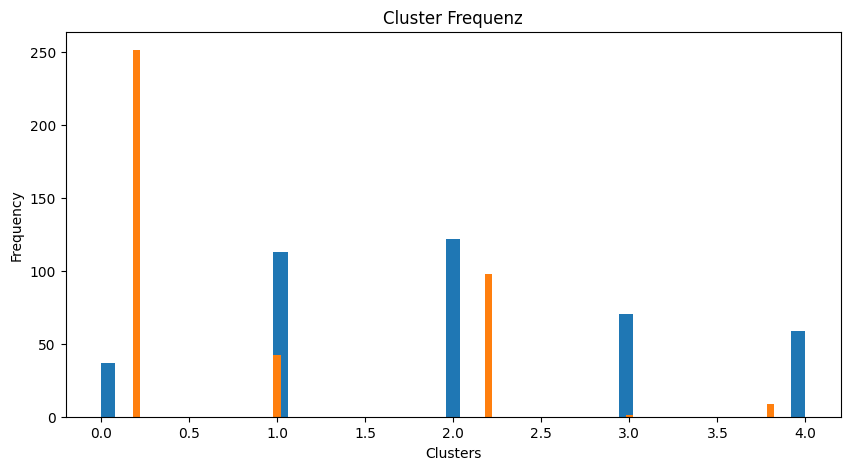

id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  Clusters  ClustersPre  
0          0.379710         2            4  
1          0.286957         2            4  
2          0.246377         2            0  
3          0.307246         2            0  
4          0.113043         1            1

In [29]:
T4Tokmeans = Teil4
T4Tokmeans['Kreisart'] = Data['Kreisart']
kmeans4 = KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T4Tokmeans[T4Tokmeans.columns[:-1]])
clusterInfo(kmeans4.labels_)
T4Kmeans = Teil1.copy()
T4Kmeans['Clusters'] = T4Kmeans['Kreisart'].apply(converter)
T4Kmeans['ClustersPre'] = kmeans4.labels_

plt.hist(T4Kmeans['Clusters'],rwidth=0.1)
plt.show()

T4Kmeans.head()        


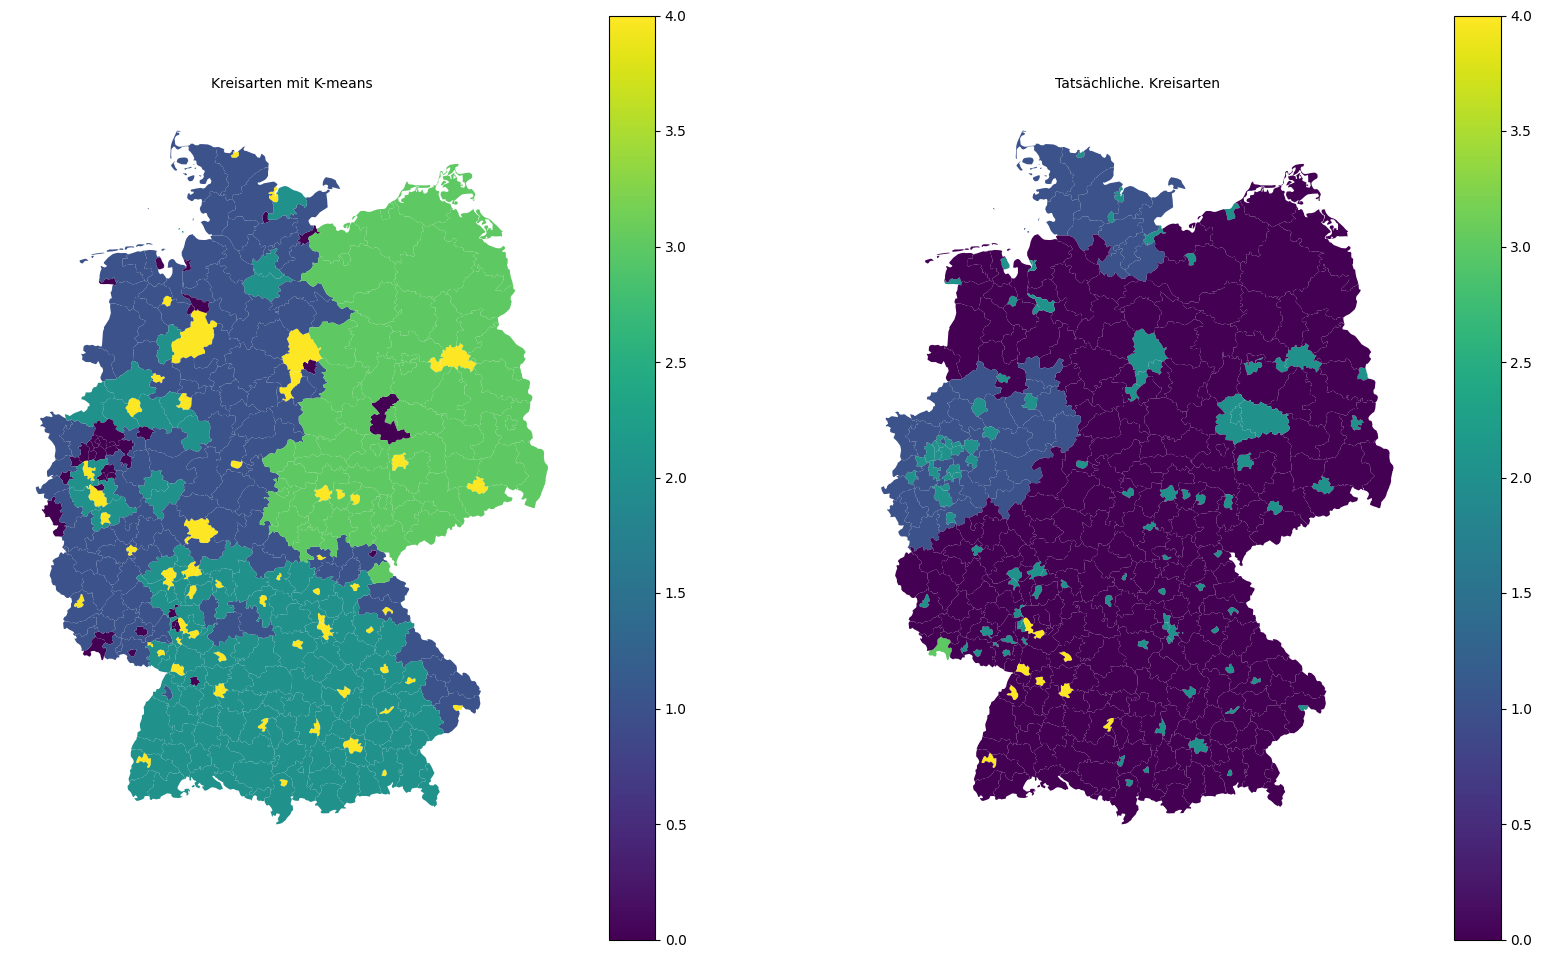

In [30]:
showMap(karte, ['Kreisarten mit K-means','Tatsächliche. Kreisarten'],kmeans4.labels_, T4Kmeans['Clusters'].array)


#### Teil4 Agg.

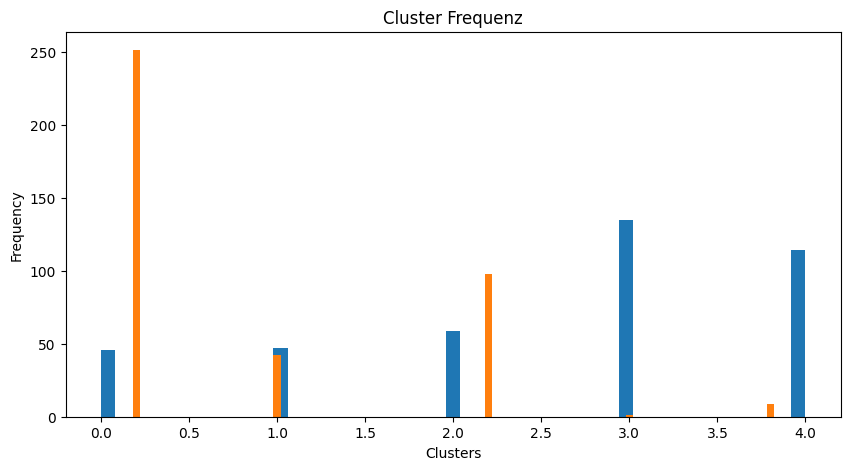

In [31]:
T4ToAgg = Teil4[Teil4.columns[:-1]]
Agg4 = aggClu(T4ToAgg, 5)#KMeans(n_clusters=5,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T3Tokmeans)
clusterInfo(Agg4.labels_)
T4Agg = Teil1.copy()
T4Agg['Clusters'] = T4Agg['Kreisart'].apply(converter)
T4Agg['ClustersPre'] = Agg4.labels_

plt.hist(T4Agg['Clusters'],rwidth=0.1)
plt.show()

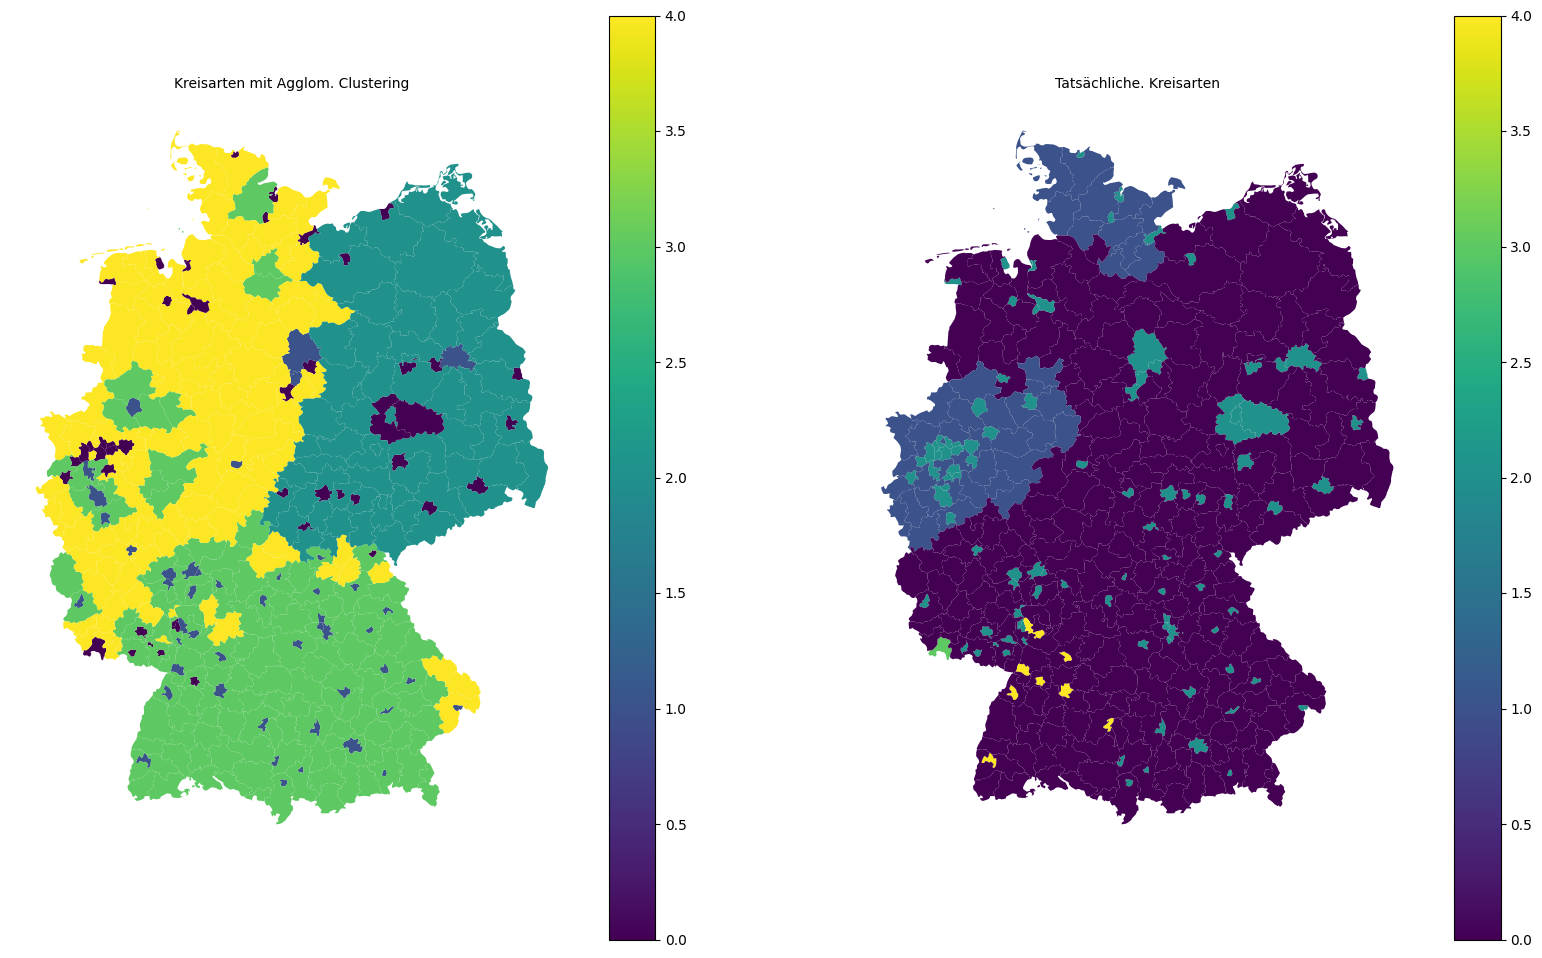

In [32]:
showMap(karte, ['Kreisarten mit Agglom. Clustering','Tatsächliche. Kreisarten'],Agg4.labels_, T4Agg['Clusters'].array)

#### Teil 5 Clustering Des gesamten Datensatz 

In [33]:
cols = Data.columns[3:485]
Teil5 = Data[cols]
Teil5.head()

Fläche_qkm  Bevölkerung  Bevölkerung_Männlich  Bevölkerung_Weiblich  \
0    0.003172     0.015397              0.015644              0.015157   
1    0.015193     0.058482              0.057771              0.059171   
2    0.032691     0.050157              0.048726              0.051542   
3    0.006586     0.012655              0.012745              0.012567   
4    0.255036     0.027233              0.027289              0.027179   

   Einwohner_pro_qkm  anteil_ausländer  anteil_bevölkerung_0_bis_17  \
0           0.351192          0.379710                     0.423077   
1           0.431133          0.286957                     0.307692   
2           0.205653          0.246377                     0.346154   
3           0.228433          0.307246                     0.512821   
4           0.012023          0.113043                     0.435897   

   anteil_bevölkerung_18_bis_24  anteil_bevölkerung_25_bis_44  \
0                      0.822917                      0.513158   
1                      0.718750                      0.743421   
2                      0.447917                      0.421053   
3                      0.458333                      0.361842   
4                      0.385417                      0.125000   

   anteil_bevölkerung_45_bis_64  ...  Sömmerda  Hildburghausen  Ilm-Kreis  \
0                      0.301587  ...  0.849962        1.000000   0.954585   
1                      0.285714  ...  0.687119        0.853195   0.795389   
2                      0.500000  ...  0.557597        0.731393   0.668002   
3                      0.515873  ...  0.651449        0.807958   0.754420   
4                      0.722222  ...  0.710101        0.827783   0.796478   

   Weimarer Land  Sonneberg  Saalfeld-Rudolstadt  Saale-Holzland-Kreis  \
0       0.860502   0.971150             0.947115              0.857236   
1       0.704277   0.823321             0.787128              0.701087   
2       0.579508   0.703792             0.658734              0.574698   
3       0.671266   0.785094             0.752528              0.676018   
4       0.728217   0.821258             0.806508              0.743895   

   Saale-Orla-Kreis     Greiz  Altenburger Land  
0          0.894098  0.835238          0.795934  
1          0.745299  0.689190          0.654630  
2          0.624901  0.569927          0.536360  
3          0.716694  0.668029          0.638611  
4          0.772860  0.738061          0.716798  

[5 rows x 482 columns]

#### Ellenbogenanalyse für Kmeans Teil5
Diese Analyse zeigt, dass wir zwischen 4 und 7 Clustern wählen können.

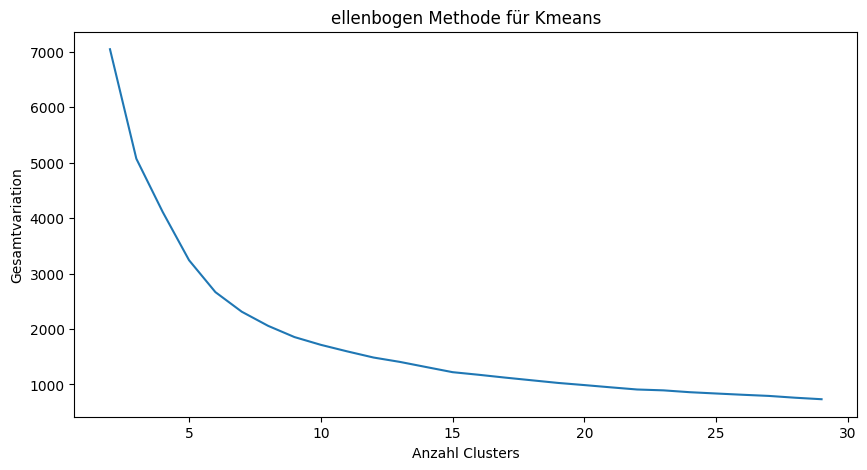

In [34]:
ellenbogen_M(Teil5, 30)


In [130]:
T5Tokmeans = Teil5
T5Tokmeans['Kreisart'] = Data['Kreisart']
kmeans5 = KMeans(n_clusters=16,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(T5Tokmeans[T5Tokmeans.columns[:-1]])
T5Kmeans = Teil1.copy()
T5Kmeans['Clusters'] = T5Kmeans['Kreisart'].apply(converter)

T5Kmeans.head()        


<ipython-input-130-b44f2b90baa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T5Tokmeans['Kreisart'] = Data['Kreisart']


id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  Clusters  
0          0.379710         2  
1          0.286957         2  
2          0.246377         2  
3          0.307246         2  
4          0.113043         1

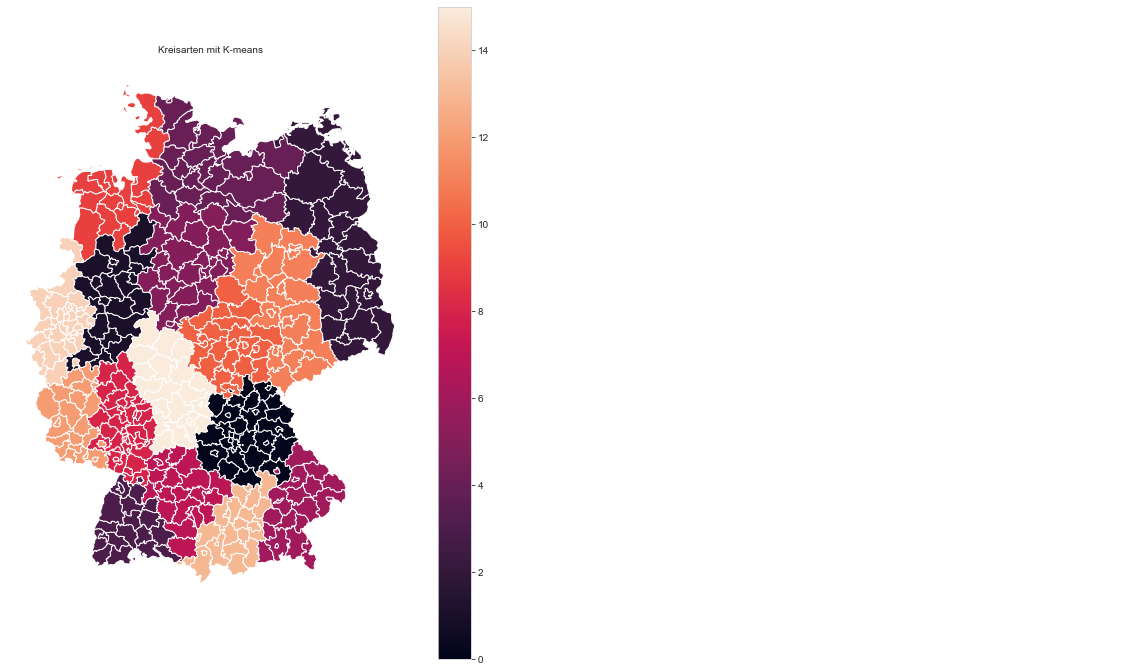

In [123]:
showMap(karte, ['Kreisarten mit K-means','Tatsächliche. Kreisarten'],kmeans5.labels_,)


Bei der obigen Grafik ist es zu entnehmen, dass alle Daten zusammen zu clustern keine sinnvolle Herangehensweise sein kann, denn dadurch werden wertvolle Infos verloren.

#### Teil 5 Agg.

In [125]:
T5ToAgg = Teil5[Teil5.columns[:-1]]
Agg5 = aggClu(T5ToAgg, 16)
T5Agg = Teil1.copy()
T5Agg['Clusters'] = T5Agg['Kreisart'].apply(converter)
display(T5Agg.head())


id          Kreisart               Landkreis  Fläche_qkm  Bevölkerung  \
0  1001  Kreisfreie Stadt        Flensburg, Stadt    0.003172     0.015397   
1  1002  Kreisfreie Stadt  Kiel, Landeshauptstadt    0.015193     0.058482   
2  1003  Kreisfreie Stadt      Lübeck, Hansestadt    0.032691     0.050157   
3  1004  Kreisfreie Stadt       Neumünster, Stadt    0.006586     0.012655   
4  1051             Kreis            Dithmarschen    0.255036     0.027233   

   Bevölkerung_Männlich  Bevölkerung_Weiblich  Einwohner_pro_qkm  \
0              0.015644              0.015157           0.351192   
1              0.057771              0.059171           0.431133   
2              0.048726              0.051542           0.205653   
3              0.012745              0.012567           0.228433   
4              0.027289              0.027179           0.012023   

   anteil_ausländer  Clusters  
0          0.379710         2  
1          0.286957         2  
2          0.246377         2  
3          0.307246         2  
4          0.113043         1

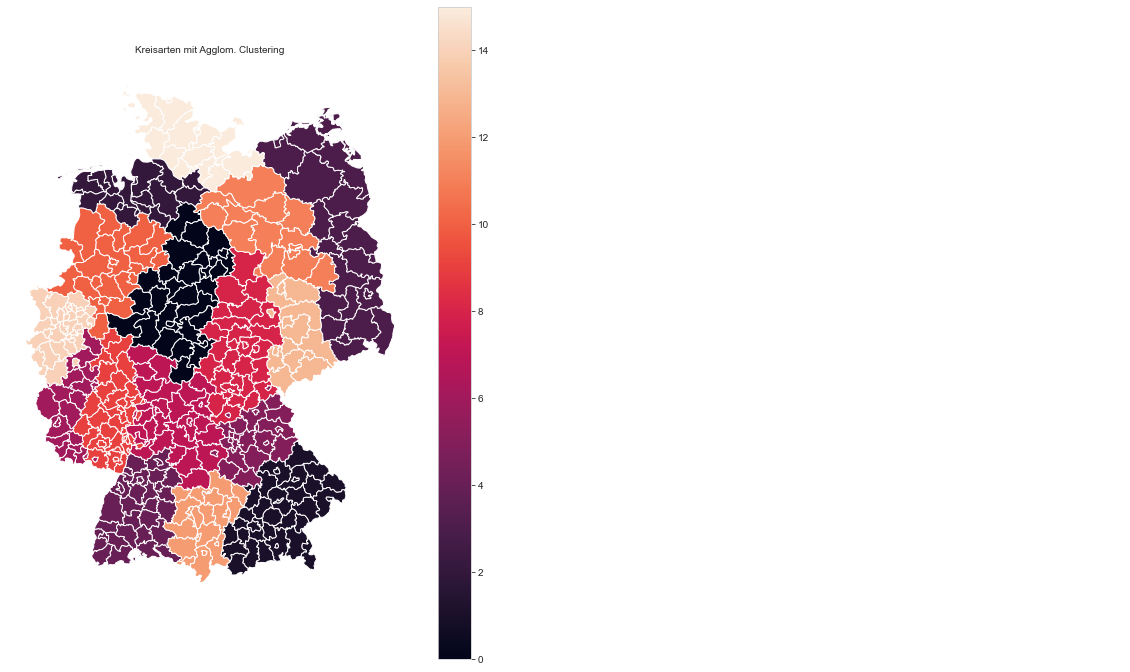

In [127]:
showMap(karte, ['Kreisarten mit Agglom. Clustering','Tatsächliche. Kreisarten'],Agg5.labels_,)

Zusammenfassend lässt sich sagen, dass die Teile 1, 3 und 4 zusammen geclustert werden können. Allerdings sollte auch eine durch zu viele Attributen höhe Komplexität verhindert werden. 

Alternativ kann gewisse Attributen, die unserem Zweck dienen können, aus oben erwähnten Teildaten ausgesucht und geclustert werden. Diese Vorgehensweise wird in ClusteringTeil1 ausprobiert.

Darüberhinaus kann dazu auch der Teil 2 mit DBscan geclustert und das Ergebnis mit dem Ergebnis anderen Clusteringalgorithmen kombiniert werden. In diesem Projekt ist diese Vorgehensweise nicht geprüft.